In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Ayus Baidhya',
 'Sahil Hamal',
 'Samir Deepak',
 'Sam Chawal',
 'Manish Udas',
 'Paulo Nhuchhen',
 'Rohan Dennis',
 'Sahil Pachya',
 'Nirmal Rajbharat',
 'Rajesh Kalawar']

In [7]:
total_customer = 200000
male_percent = 58

male = {'Name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'Name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['Gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['Gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'Gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'Gender'
] = 'Prefer not to say'

In [11]:
df.Gender.value_counts()

Male                 104462
Female                74348
Other                 13875
Prefer not to say      7315
Name: Gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['Email'] = df.Name.apply(email_gen)

In [14]:
df

,Name,Gender,Email
0,Pralhad Aacharya,Male,pralhad.aacharya@fakeemail.com
1,Malkit Marar,Male,malkit.marar@fakeemail.com
2,Peter Jyakhwa,Male,peter.jyakhwa@fakeemail.com
3,Pusendra Bhaiju,Male,pusendra.bhaiju@fakeemail.com
4,Jason Gajmer,Male,jason.gajmer@fakeemail.com
...,...,...,...
83995,Kusum Marshaine,Other,kusum.marshaine@fakeemail.com
83996,Reeya Chowdhary,Female,reeya.chowdhary@fakeemail.com
83997,Riyane Ranabhat,Other,riyane.ranabhat@fakeemail.com
83998,Riyane Mahto,Female,riyane.mahto@fakeemail.com


In [15]:
df['Phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,Name,Gender,Email,Phone
0,Pralhad Aacharya,Male,pralhad.aacharya@fakeemail.com,9841602405
1,Malkit Marar,Male,malkit.marar@fakeemail.com,9841107578
2,Peter Jyakhwa,Male,peter.jyakhwa@fakeemail.com,9841956431
3,Pusendra Bhaiju,Male,pusendra.bhaiju@fakeemail.com,9841495728
4,Jason Gajmer,Male,jason.gajmer@fakeemail.com,9841559908
...,...,...,...,...
83995,Kusum Marshaine,Other,kusum.marshaine@fakeemail.com,9841698704
83996,Reeya Chowdhary,Female,reeya.chowdhary@fakeemail.com,9841273411
83997,Riyane Ranabhat,Other,riyane.ranabhat@fakeemail.com,9841052715
83998,Riyane Mahto,Female,riyane.mahto@fakeemail.com,9841091829


In [17]:
df['Channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'Channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'Channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'Channel'
] = 'Other'

In [19]:
df

,Name,Gender,Email,Phone,Channel
0,Pralhad Aacharya,Male,pralhad.aacharya@fakeemail.com,9841602405,Facebook/Ads
1,Malkit Marar,Male,malkit.marar@fakeemail.com,9841107578,Facebook/Ads
2,Peter Jyakhwa,Male,peter.jyakhwa@fakeemail.com,9841956431,Facebook/Ads
3,Pusendra Bhaiju,Male,pusendra.bhaiju@fakeemail.com,9841495728,Google Search
4,Jason Gajmer,Male,jason.gajmer@fakeemail.com,9841559908,Word of Mouth
...,...,...,...,...,...
83995,Kusum Marshaine,Other,kusum.marshaine@fakeemail.com,9841698704,Facebook/Ads
83996,Reeya Chowdhary,Female,reeya.chowdhary@fakeemail.com,9841273411,Google Search
83997,Riyane Ranabhat,Other,riyane.ranabhat@fakeemail.com,9841052715,Facebook/Ads
83998,Riyane Mahto,Female,riyane.mahto@fakeemail.com,9841091829,Google Search


In [20]:
df.Channel.value_counts()

Facebook/Ads     76751
Google Search    54726
Other            35196
Word of Mouth    33327
Name: Channel, dtype: int64

In [21]:
df['First Contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'First Contact'
] = 'browser'

In [23]:
df

,Name,Gender,Email,Phone,Channel,First Contact
0,Pralhad Aacharya,Male,pralhad.aacharya@fakeemail.com,9841602405,Facebook/Ads,browser
1,Malkit Marar,Male,malkit.marar@fakeemail.com,9841107578,Facebook/Ads,browser
2,Peter Jyakhwa,Male,peter.jyakhwa@fakeemail.com,9841956431,Facebook/Ads,browser
3,Pusendra Bhaiju,Male,pusendra.bhaiju@fakeemail.com,9841495728,Google Search,browser
4,Jason Gajmer,Male,jason.gajmer@fakeemail.com,9841559908,Word of Mouth,app
...,...,...,...,...,...,...
83995,Kusum Marshaine,Other,kusum.marshaine@fakeemail.com,9841698704,Facebook/Ads,browser
83996,Reeya Chowdhary,Female,reeya.chowdhary@fakeemail.com,9841273411,Google Search,browser
83997,Riyane Ranabhat,Other,riyane.ranabhat@fakeemail.com,9841052715,Facebook/Ads,browser
83998,Riyane Mahto,Female,riyane.mahto@fakeemail.com,9841091829,Google Search,browser


In [24]:
df['First Contact'].value_counts()

browser    172264
app         27736
Name: First Contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,Name,Gender,Email,Phone,Channel,First Contact
304,Asutosh Angeni,Male,asutosh.angeni@fakeemail.com,9841413521,Other,browser
31016,Nitish Purbachhane,Male,nitish.purbachhane@fakeemail.com,9841552118,Facebook/Ads,browser
19041,Karuna Ojha,Other,karuna.ojha@fakeemail.com,9841745887,Facebook/Ads,app
9196,Bibhas Shibakoti,Male,bibhas.shibakoti@fakeemail.com,9841019653,Other,browser
897,Udgam Sijali,Male,udgam.sijali@fakeemail.com,9841707406,Facebook/Ads,browser
...,...,...,...,...,...,...
2198,Aditya Panchakotee,Male,aditya.panchakotee@fakeemail.com,9841599944,Other,browser
26102,Nisu Jamakatel,Female,nisu.jamakatel@fakeemail.com,9841628318,Google Search,browser
50192,Pashupati Chaulagain,Male,pashupati.chaulagain@fakeemail.com,9841634844,Facebook/Ads,browser
13546,Sam Aeri,Male,sam.aeri@fakeemail.com,9841676351,Other,browser


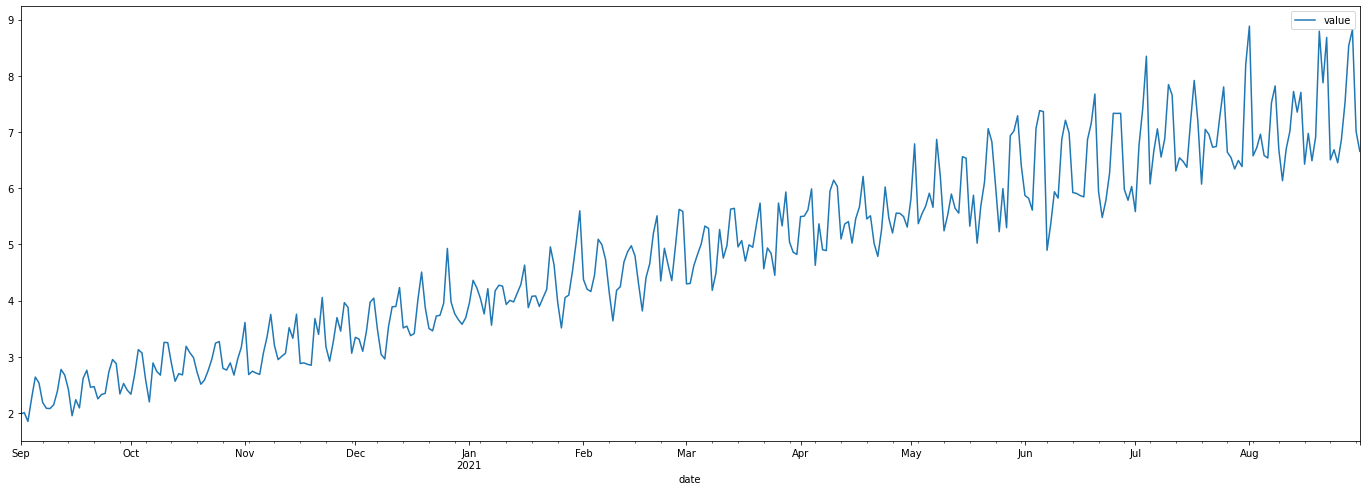

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (100*data.value).astype(int)

In [30]:
data.rows.sum()

176121

In [31]:
data

,date,base_amount,white_noise,my_linear_trend,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,0.917232,2.000000,1.0,1.834465,1.834465,183
1,2020-09-02,1.0,0.914792,2.013699,1.0,1.842116,1.842116,184
2,2020-09-03,1.0,1.059325,2.027397,1.0,2.147673,2.147673,214
3,2020-09-04,1.0,0.952138,2.041096,1.1,2.137745,2.137745,213
4,2020-09-05,1.0,1.007515,2.054795,1.2,2.484284,2.484284,248
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,0.987621,6.931507,1.1,7.530272,7.530272,753
361,2021-08-28,1.0,1.123540,6.945205,1.2,9.363863,9.363863,936
362,2021-08-29,1.0,0.931957,6.958904,1.2,7.782481,7.782481,778
363,2021-08-30,1.0,1.082187,6.972603,1.0,7.545659,7.545659,754


In [32]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [33]:
final_dates = (data.apply(create_list, axis=1).sum())

In [34]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [35]:
clients['Created At'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69228/3226454060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = final_dates


In [36]:
clients

,Name,Gender,Email,Phone,Channel,First Contact,Created At
0,Asutosh Angeni,Male,asutosh.angeni@fakeemail.com,9841413521,Other,browser,2020-09-01 00:00:00
1,Nitish Purbachhane,Male,nitish.purbachhane@fakeemail.com,9841552118,Facebook/Ads,browser,2020-09-01 00:00:00
2,Karuna Ojha,Other,karuna.ojha@fakeemail.com,9841745887,Facebook/Ads,app,2020-09-01 00:00:00
3,Bibhas Shibakoti,Male,bibhas.shibakoti@fakeemail.com,9841019653,Other,browser,2020-09-01 00:00:00
4,Udgam Sijali,Male,udgam.sijali@fakeemail.com,9841707406,Facebook/Ads,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
176116,Pradeep raj nepal Dhawal,Male,pradeep.raj@fakeemail.com,9841036446,Google Search,browser,2021-08-31 00:00:00
176117,Ansu Dumaru,Female,ansu.dumaru@fakeemail.com,9841568325,Facebook/Ads,browser,2021-08-31 00:00:00
176118,Yashoda Poddhar,Female,yashoda.poddhar@fakeemail.com,9841206655,Other,browser,2021-08-31 00:00:00
176119,Bikash Bhattara,Male,bikash.bhattara@fakeemail.com,9841236265,Facebook/Ads,app,2021-08-31 00:00:00


In [37]:
clients.Gender.value_counts()

Male                 92022
Female               65450
Other                12242
Prefer not to say     6407
Name: Gender, dtype: int64

In [38]:
clients.Channel.value_counts()

Facebook/Ads     67580
Google Search    48266
Other            30894
Word of Mouth    29381
Name: Channel, dtype: int64

In [39]:
clients['First Contact'].value_counts()

browser    151612
app         24509
Name: First Contact, dtype: int64

In [40]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [41]:
clients['Created At'] = clients['Created At'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69228/2194111193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = clients['Created At'].apply(random_times)


In [42]:
clients['Client ID'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69228/736601839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Client ID'] = clients.index + 100000000


In [43]:
clients

,Name,Gender,Email,Phone,Channel,First Contact,Created At,Client ID
0,Asutosh Angeni,Male,asutosh.angeni@fakeemail.com,9841413521,Other,browser,2020-09-01 06:49:26.933516,100000000
1,Nitish Purbachhane,Male,nitish.purbachhane@fakeemail.com,9841552118,Facebook/Ads,browser,2020-09-01 17:19:28.935853,100000001
2,Karuna Ojha,Other,karuna.ojha@fakeemail.com,9841745887,Facebook/Ads,app,2020-09-01 17:33:26.283485,100000002
3,Bibhas Shibakoti,Male,bibhas.shibakoti@fakeemail.com,9841019653,Other,browser,2020-09-01 11:25:45.173735,100000003
4,Udgam Sijali,Male,udgam.sijali@fakeemail.com,9841707406,Facebook/Ads,browser,2020-09-01 11:54:58.370206,100000004
...,...,...,...,...,...,...,...,...
176116,Pradeep raj nepal Dhawal,Male,pradeep.raj@fakeemail.com,9841036446,Google Search,browser,2021-08-31 16:18:14.039429,100176116
176117,Ansu Dumaru,Female,ansu.dumaru@fakeemail.com,9841568325,Facebook/Ads,browser,2021-08-31 05:13:32.898012,100176117
176118,Yashoda Poddhar,Female,yashoda.poddhar@fakeemail.com,9841206655,Other,browser,2021-08-31 20:12:54.658954,100176118
176119,Bikash Bhattara,Male,bikash.bhattara@fakeemail.com,9841236265,Facebook/Ads,app,2021-08-31 19:44:17.607413,100176119


In [44]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [45]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [46]:
random.shuffle(dob)

In [47]:
clients['DOB'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_69228/2893224849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['DOB'] = dob[:clients.shape[0]]


In [48]:
clients

,Name,Gender,Email,Phone,Channel,First Contact,Created At,Client ID,DOB
0,Asutosh Angeni,Male,asutosh.angeni@fakeemail.com,9841413521,Other,browser,2020-09-01 06:49:26.933516,100000000,2002-08-25
1,Nitish Purbachhane,Male,nitish.purbachhane@fakeemail.com,9841552118,Facebook/Ads,browser,2020-09-01 17:19:28.935853,100000001,1991-05-10
2,Karuna Ojha,Other,karuna.ojha@fakeemail.com,9841745887,Facebook/Ads,app,2020-09-01 17:33:26.283485,100000002,1999-11-11
3,Bibhas Shibakoti,Male,bibhas.shibakoti@fakeemail.com,9841019653,Other,browser,2020-09-01 11:25:45.173735,100000003,1997-03-09
4,Udgam Sijali,Male,udgam.sijali@fakeemail.com,9841707406,Facebook/Ads,browser,2020-09-01 11:54:58.370206,100000004,1981-02-21
...,...,...,...,...,...,...,...,...,...
176116,Pradeep raj nepal Dhawal,Male,pradeep.raj@fakeemail.com,9841036446,Google Search,browser,2021-08-31 16:18:14.039429,100176116,2007-03-23
176117,Ansu Dumaru,Female,ansu.dumaru@fakeemail.com,9841568325,Facebook/Ads,browser,2021-08-31 05:13:32.898012,100176117,2000-07-04
176118,Yashoda Poddhar,Female,yashoda.poddhar@fakeemail.com,9841206655,Other,browser,2021-08-31 20:12:54.658954,100176118,2008-10-10
176119,Bikash Bhattara,Male,bikash.bhattara@fakeemail.com,9841236265,Facebook/Ads,app,2021-08-31 19:44:17.607413,100176119,1998-11-01


In [49]:
list(clients)

['Name',
 'Gender',
 'Email',
 'Phone',
 'Channel',
 'First Contact',
 'Created At',
 'Client ID',
 'DOB']

In [50]:
clients[['Client ID',
 'Name',
 'Gender',
 'Email',
 'Phone',
 'Channel',
 'First Contact',
         'DOB',
 'Created At']
].to_csv('../datasets/clients.csv', index=False)